## Lead Scoring Study Case By Vivek Patade.

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# importing libraries
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# reading dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
# checking the dimensions of the dataframe
leads.shape

(9240, 37)

In [16]:
# statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [17]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
# check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

**No duplicate values in prospect ID**

In [19]:
# check for dupliactes
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

## Exploratory Data Analysis

### Data cleaning and Treatment

In [20]:
# converting select values in the data set as null
leads = leads.replace('Select', np.nan)

In [21]:
# calculating the percentage of na\null values in the dataset
round(100*leads.isna().sum()/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [23]:
#Dropping columns with more than 40% null values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads))) >= 40):
        leads.drop(i, 1, inplace = True)

In [24]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [25]:
# again checking null values percentage 
round(100*leads.isna().sum()/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## Data Imputing with Mode values

In [27]:
# checking value counts of country column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
Belgium                    2
China                      2
Italy                      2
Ghana                      2
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Bangladesh                 2
Netherlands                2
Switzerland                1
Tanzania                   1
Kenya                      1
Vietnam                    1
Denmark                    1
Russia        

In [28]:
# replacing null values in country coloumn with mode india
leads['Country'].fillna('India', inplace=True)

In [29]:
# checking sum of null values on the country column
leads['Country'].isna().sum()

0

In [32]:
# as we can see the number of values for india are quite high
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

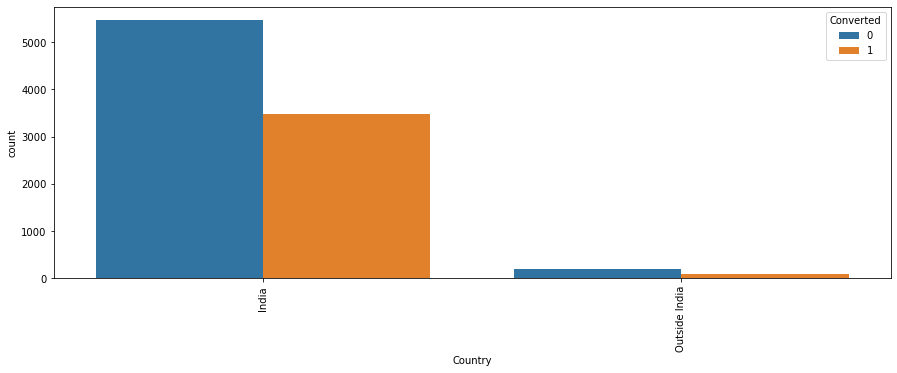

In [34]:
# plotting spread of country column
plt.figure(figsize=(15,5))
p1 = sns.countplot(leads.Country, hue=leads.Converted)
p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
plt.show()

**As we can see the number of values for india are quite hight, so this column can be dropped.**

In [35]:
# creating a list of columns to be dropped
drop_cols = ['Country']

In [37]:
# checking value counts of specialization column
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [38]:
# replacing null values in the specialization column with not specified since the specialization might not be present in the list.
leads['Specialization'].fillna('Not Specified', inplace=True)

In [39]:
# combining management specialization because they show similar trends
leads['Specialization'] = leads['Specialization'].replace(['Finance Management', 'Human Resouce Management',
                                                          'Marketing Management', 'Operations Management',
                                                          'IT Projects Management', 'Supply Chain Management',
                                                          'Healthcare Management', 'Hospitality Management',
                                                          'Retail Management'], 'Management_specialization')

<AxesSubplot:xlabel='Converted', ylabel='Specialization'>

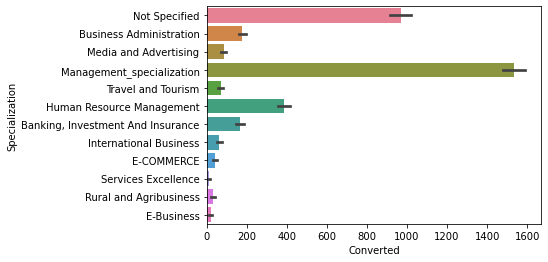

In [40]:
# plotting spread of specialization column
sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [41]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [43]:
# filling null values with mode
leads['What is your current occupation'].fillna('Unemployed', inplace=True)

<AxesSubplot:xlabel='Converted', ylabel='What is your current occupation'>

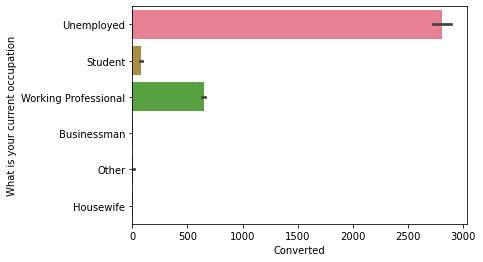

In [46]:
# plotting spread
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [47]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [49]:
# we see many people opt for a course for better career prospects, we replace the null value with the same
leads['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

In [52]:
leads['What matters most to you in choosing a course'].isna().sum()

0

<AxesSubplot:xlabel='Converted', ylabel='What matters most to you in choosing a course'>

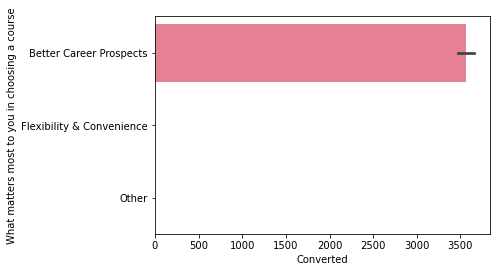

In [54]:
sns.barplot(y='What matters most to you in choosing a course', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [55]:
# we have another column that is worth dropping. so we attend to drop_cols list
drop_cols.append('what matters most to you in choosing a course')
drop_cols

['Country', 'what matters most to you in choosing a course']

In [56]:
# checking value counts of tags column
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [57]:
# imputing tags with mode
leads['Tags'].fillna('Not Specified', inplace=True)

In [58]:
leads['Tags'].isnull().sum()

0

In [59]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                       'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')



<AxesSubplot:xlabel='Converted', ylabel='Tags'>

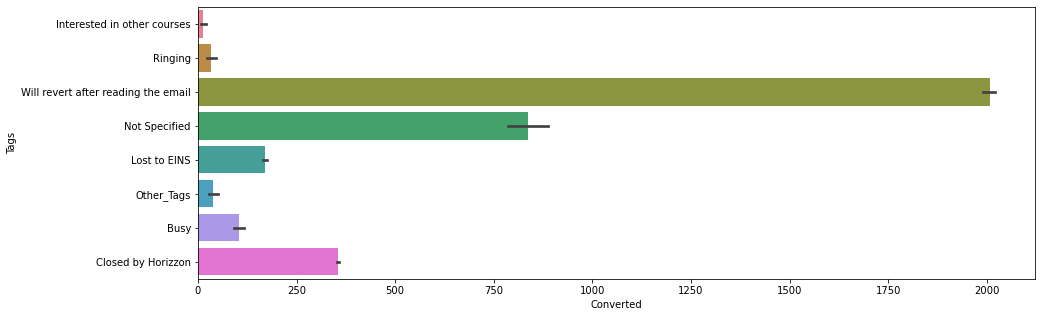

In [60]:
# plotting spread of tags column
plt.figure(figsize=(15,5))
sns.barplot(y='Tags', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [61]:
# checking value couts of city column
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [62]:
# replacing na values for city with maharashtra
leads['City'].fillna('Mumbai', inplace=True)

In [63]:
leads['City'].isnull().sum()

0

<AxesSubplot:xlabel='Converted', ylabel='City'>

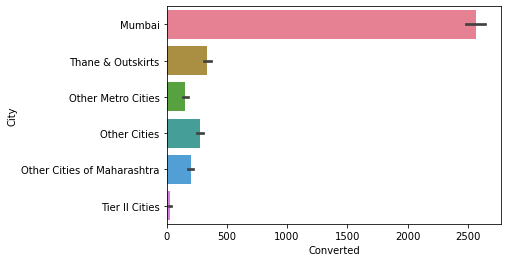

In [64]:
# plotting spread of city column
sns.barplot(y='City', x='Converted', palette='husl', data=leads, estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='City'>

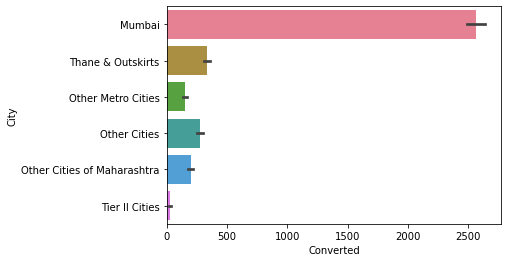

In [67]:
#plotting spread of 'City' columnn 
sns.barplot(y='City', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [68]:
round(100*leads.isna().sum()/len(leads), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [69]:
# checking value counts of lead source column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
youtubechannel          1
blog                    1
testone                 1
Name: Lead Source, dtype: int64

In [71]:
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook', 'Social Media')

In [72]:
# checking value counts of last activity column
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [73]:
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                        'View in browser link Clicked', 'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [74]:
leads['Lead Source'].fillna('Others', inplace=True)
leads['Last Activity'].fillna('Others', inplace=True)

**Imputing with median values because the continuous variables have outliers.**

In [77]:
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace=True)
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace=True)

**Checking null values percentage post imputing data**

In [78]:
round(100*leads.isnull().sum()/len(leads), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [79]:
# checking value counts of lead origin column lead origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

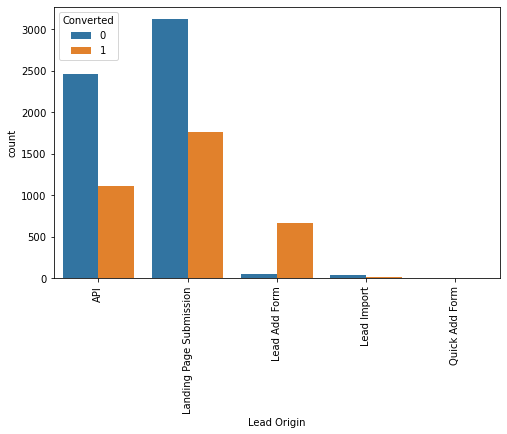

In [81]:
# visualization count of lead origin based on converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

**Inference**: 
1. API and landing page submission bring higher number of leads as well as conversion.
2. Lead add form has a very high conversion rate but count of leads are not very high.
3. Lead import and quick add form get very gew leads.

In [82]:
# checking value counts of lead source column
leads['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
google                 5
Live Chat              2
Name: Lead Source, dtype: int64

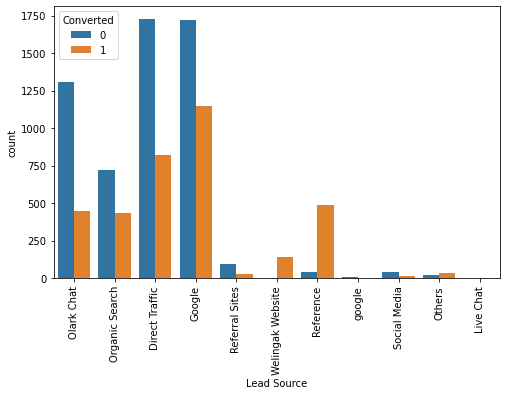

In [84]:
#visualizing count of Lead Source based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

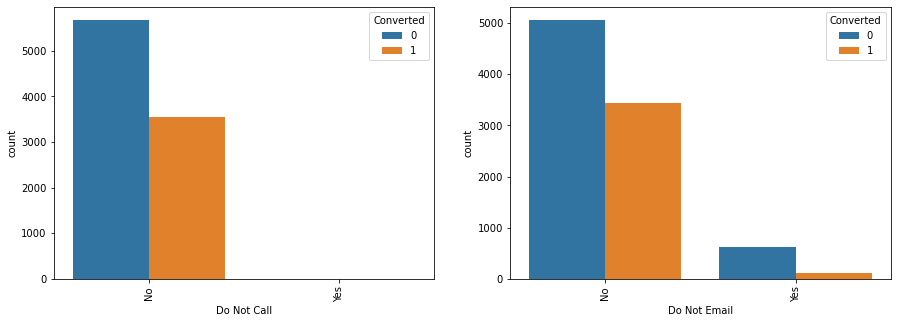

In [87]:
# visualizing count of do not email and do not call based on converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1 = sns.countplot(leads['Do Not Call'], hue = leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2 = sns.countplot(leads['Do Not Email'], hue = leads.Converted)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()

In [90]:
# checking value counts for do not call
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [91]:
# we can append the do not call colomn to the list of columns
drop_cols.append('Do Not Call')
drop_cols

['Country', 'what matters most to you in choosing a course', 'Do Not Call']

In [92]:
# checking value counts for do not email
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

**IMBALANCED VARIABLES THAT CAN BE DROPPED**

In [93]:
 # checking value counts of search column
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [94]:
# checking value counts of newspaper article column
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [95]:
# checking value counts of x education forums column
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [96]:
# checking values counts of magazines column
leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [97]:
# checking value counts of digital advertisement column
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [98]:
# checking value counts of newspaper column
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [102]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [103]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [108]:
#checking value counts of Get updates on DM Content column
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [110]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [112]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [113]:
#adding imbalanced columns to the list of columns to be dropped

drop_cols.extend(['Search','Newspaper Article','X Education Forums','Magazine','Digital Advertisement','Through Recommendations',
                     'Newspaper','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                     'I agree to pay the amount through cheque'])

In [114]:
# checking value counts of last notable activity
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [115]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [116]:
leads['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

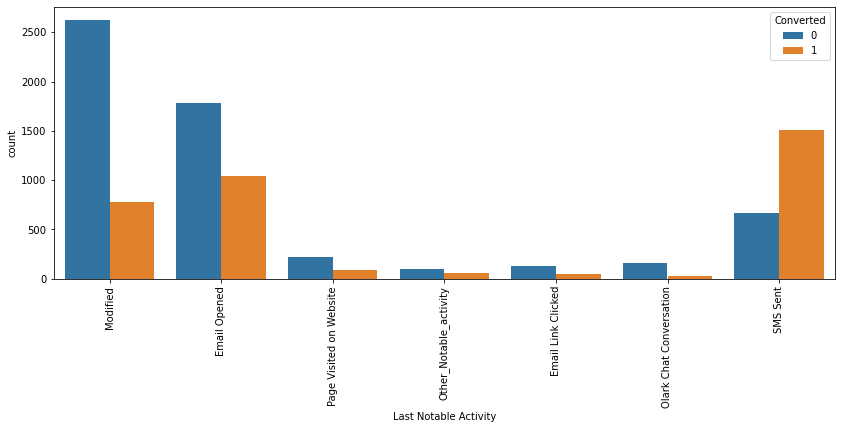

In [117]:
# visualizing count of last notable activity based on converted value
plt.figure(figsize=(14,5))
ax1 = sns.countplot(x = "Last Notable Activity", hue="Converted", data=leads)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()

In [118]:
drop_cols

['Country',
 'what matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Magazine',
 'Digital Advertisement',
 'Through Recommendations',
 'Newspaper',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

## Outlier Treatment

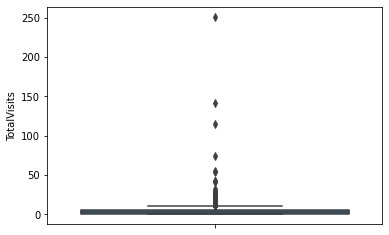

In [122]:
# total visits
# visualizing spead of varibale

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [123]:
# checking percentile values for total visits
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

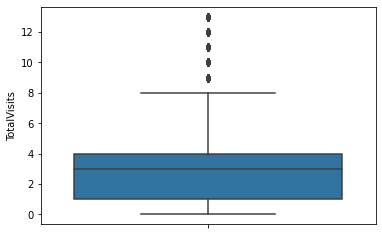

In [127]:
# outlier treatment : remove top & bottom 2% of the columm outliers values 
Q3 = leads.TotalVisits.quantile(0.98)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.02)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

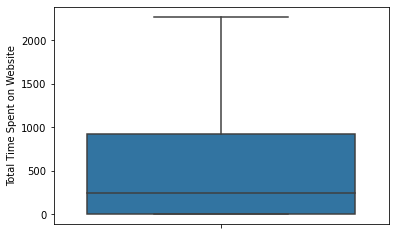

In [128]:
# total time spent on website
# visualizing spread of variable
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

**Since there are no major outliers for the above variable we dont do any outlier treatment for this above column**

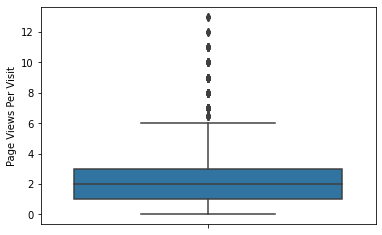

In [129]:
# page views per visit
# visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [130]:
# checking spread
leads['Page Views Per Visit'].describe()

count    9066.000000
mean        2.298612
std         1.979081
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

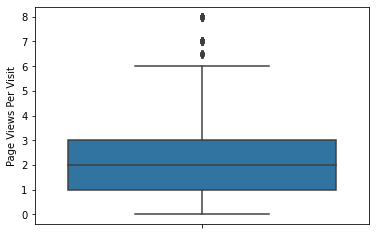

In [133]:
# outlier treatment : remove top & bottom 1% of the column outlier values
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [134]:
leads.shape

(8970, 30)

### Numerical Variable Analysis:


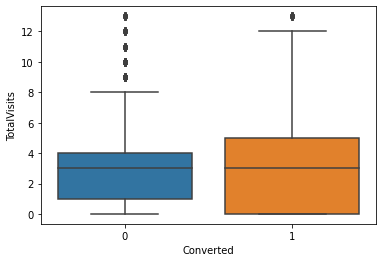

In [135]:
# checking total visits vs converted variable
sns.boxplot(y='TotalVisits', x='Converted', data=leads)
plt.show()

**Inference**:
    Median for converted and not converted leads are the close

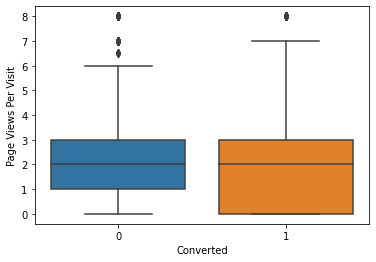

In [136]:
sns.boxplot(x=leads.Converted, y=leads['Page Views Per Visit'])
plt.show()

**Inference**

Median for converted and unconverted leads in the same.

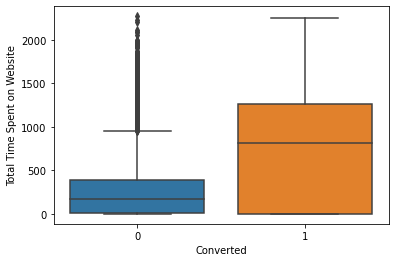

In [138]:
sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

**Inference** : Website should be made more engaging as leads spending more time on the websiter are more likely to be converted, so to make leads spent more time.

In [139]:
# correlation matrix
cor = leads.corr()
cor

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025846,0.055278,0.021124,0.066686
Converted,0.025846,1.000000,0.045138,0.357764,-0.006531
TotalVisits,0.055278,0.045138,1.000000,0.356554,0.750531
Total Time Spent on Website,0.021124,0.357764,0.356554,1.000000,0.351839
Page Views Per Visit,0.066686,-0.006531,0.750531,0.351839,1.000000


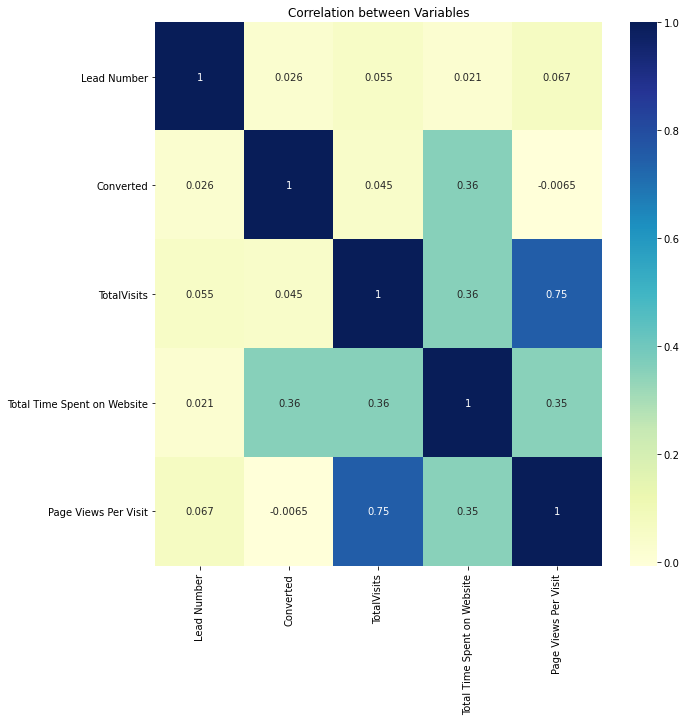

In [140]:
# checking correlation of numeric values
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.title("Correlation between Variables")
plt.show()

In [141]:
leads.shape

(8970, 30)

### Creation dummy variable

In [142]:
# list of categorical colomns
categorical_cols = leads.select_dtypes(include=['object']).columns
categorical_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [143]:
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Other_Notable_activity
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,Other_Tags,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,Other_Tags,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,Not Specified,No,No,Other Metro Cities,No,No,SMS Sent


**So, We have two columns A free copy of mastering the interview & do not email to be changed to {0,1}**

In [146]:
var_list =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[var_list] = leads[var_list].apply(binary_map)

In [147]:
dummy = pd.get_dummies(leads[['Lead Origin', 'What is your current occupation',
                             'City']], drop_first=True)
leads = pd.concat([leads, dummy], 1)

In [148]:
leads.shape

(8970, 44)

In [150]:
dummy = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis=1)

In [151]:
dummy = pd.get_dummies(leads['Lead Source'], prefix = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis=1)

In [152]:
dummy = pd.get_dummies(leads['Tags'], prefix = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis=1)

In [154]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [155]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [156]:
# dropping original columns
leads.drop(categorical_cols,1,inplace=True)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Logistic Regression Model Building:

### Spliting data to train-test:

In [157]:
from sklearn.model_selection import train_test_split

y = leads['Converted']
X = leads.drop('Converted', axis=1)

In [158]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling of data:

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3804,0.275338,-1.145037,-0.883887,-1.227965,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3283,0.487464,-0.002002,-0.061187,-0.399189,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5508,-0.411424,1.522043,1.107818,2.639657,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5160,-0.293528,-0.002002,0.860458,0.429587,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7048,-0.929303,2.284066,1.375334,1.258363,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Feature Selection using REF

In [163]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [164]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)    
rfe = rfe.fit(X_train, y_train)

In [167]:
rfe.support_

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False])

In [168]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 43),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Origin_Quick Add Form', False, 26),
 ('What is your current occupation_Housewife', False, 45),
 ('What is your current occupation_Other', False, 37),
 ('What is your current occupation_Student', False, 48),
 ('What is your current occupation_Unemployed', False, 5),
 ('What is your current occupation_Working Professional', False, 23),
 ('City_Other Cities', False, 51),
 ('City_Other Cities of Maharashtra', False, 50),
 ('City_Other Metro Cities', False, 32),
 ('City_Thane & Outskirts', False, 41),
 ('City_Tier II Cities', False, 36),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 52),
 ('Lead Source_Olark Chat', False, 27),
 ('Lead Source_Organic 

In [169]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Welingak Website', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [171]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Direct Traffic',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Social Media',
       'Lead Source_google',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Human Resource Management',
       'Sp

In [172]:
import statsmodels.api as sm

In [173]:
# logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1228.1
Date:                Fri, 31 Dec 2021   Deviance:                       2456.2
Time:                        20:29:04   Pearson chi2:                 7.28e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3755      0.123     -3.065      0.002      -0.616      -0.135
Total Time Spent on Website                       1.0040      0.060     16.740      0.000       0.886       1.122
Lead Origin_Lead Add Form                         1.2678      0.790      1.605      0.108      -0.280       2.816
Lead Source_Google                               -0.5620      0.078     -7.208      0.000      -0.715      -0.409
Lead Source_Google                               -0.5620      0.078     -7.208      0.000      -0.715      -0.409
Lead Source_Reference                            -0.8476      0.434     -1.954      0.051      -1.698       0.003
Lead Source_Reference                            -0.8476      0.434     -1.954      0.051      -1.698       0.003
Lead Source_Referral Sites                       -0.5393      0.242     -2.229      0.026      -1.014      -0.065
Lead Source_Referral Sites                       -0.5393      0.242     -2.229      0.026      -1.014      -0.065
Lead Source_Welingak Website                      0.7840      0.268      2.928      0.003       0.259       1.309
Lead Source_Welingak Website                      0.7840      0.268      2.928      0.003       0.259       1.309
Lead Source_Direct Traffic                       -0.7742      0.086     -9.015      0.000      -0.942      -0.606
Lead Source_Direct Traffic                       -0.7742      0.086     -9.015      0.000      -0.942      -0.606
Lead Source_Organic Search                       -0.6168      0.101     -6.105      0.000      -0.815      -0.419
Lead Source_Organic Search                       -0.6168      0.101     -6.105      0.000      -0.815      -0.419
Lead Source_Welingak Website                      0.7840      0.268      2.928      0.003       0.259       1.309
Lead Source_Welingak Website                      0.7840      0.268      2.928      0.003       0.259       1.309
Tags_Closed by Horizzon                           7.2050      0.751      9.588      0.000       5.732       8.678
Tags_Interested in other courses                 -2.0209      0.421     -4.796      0.000      -2.847      -1.195
Tags_Lost to EINS                                 6.5170      0.735      8.870      0.000       5.077       7.957
Tags_Other_Tags                                  -2.4760      0.227    -10.926      0.000      -2.920      -2.032
Tags_Ringing                                     -3.4843      0.249    -13.968      0.000      -3.973      -2.995
Tags_Will revert after reading the email          4.7069      0.196     23.989      0.000       4.322       5.091
Last Activity_SMS Sent                            2.0438      0.116     17.593      0.000       1.816       2.272
Last 

In [175]:

col = col.drop('Lead Source_Welingak Website',1)

In [176]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1232.8
Date:                Fri, 31 Dec 2021   Deviance:                       2465.6
Time:                        20:31:23   Pearson chi2:                 8.03e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3711      0.123     -3.029      0.002      -0.611      -0.131
Total Time Spent on Website                       1.0037      0.060     16.713      0.000       0.886       1.121
Lead Origin_Lead Add Form                         3.3721      0.437      7.723      0.000       2.516       4.228
Lead Source_Google                               -0.5612      0.078     -7.193      0.000      -0.714      -0.408
Lead Source_Google                               -0.5612      0.078     -7.193      0.000      -0.714      -0.408
Lead Source_Reference                            -1.8972      0.284     -6.673      0.000      -2.454      -1.340
Lead Source_Reference                            -1.8972      0.284     -6.673      0.000      -2.454      -1.340
Lead Source_Referral Sites                       -0.5395      0.242     -2.230      0.026      -1.014      -0.065
Lead Source_Referral Sites                       -0.5395      0.242     -2.230      0.026      -1.014      -0.065
Lead Source_Direct Traffic                       -0.7728      0.086     -8.995      0.000      -0.941      -0.604
Lead Source_Direct Traffic                       -0.7728      0.086     -8.995      0.000      -0.941      -0.604
Lead Source_Organic Search                       -0.6155      0.101     -6.088      0.000      -0.814      -0.417
Lead Source_Organic Search                       -0.6155      0.101     -6.088      0.000      -0.814      -0.417
Tags_Closed by Horizzon                           7.2070      0.751      9.591      0.000       5.734       8.680
Tags_Interested in other courses                 -2.0220      0.421     -4.798      0.000      -2.848      -1.196
Tags_Lost to EINS                                 6.5193      0.735      8.873      0.000       5.079       7.959
Tags_Other_Tags                                  -2.4844      0.226    -10.971      0.000      -2.928      -2.041
Tags_Ringing                                     -3.5270      0.251    -14.055      0.000      -4.019      -3.035
Tags_Will revert after reading the email          4.7039      0.196     23.952      0.000       4.319       5.089
Last Activity_SMS Sent                            2.0428      0.116     17.615      0.000       1.816       2.270
Last Notable Activity_Modified                   -1.8285      0.129    -14.204      0.000      -2.081      -1.576
Last Notable Activity_Olark Chat Conversation    -1.8465      0.420     -4.391      0.000      -2.671      -1.022
=================================================================================================================
"""

**Checking VIFs**

In [178]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [179]:
# create a dataframe that will contain the names of all the feature variables and thier respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
10,Lead Source_Organic Search,inf
6,Lead Source_Referral Sites,inf
11,Lead Source_Organic Search,inf
9,Lead Source_Direct Traffic,inf
7,Lead Source_Referral Sites,inf
8,Lead Source_Direct Traffic,inf
5,Lead Source_Reference,inf
4,Lead Source_Reference,inf
3,Lead Source_Google,inf
2,Lead Source_Google,inf


### VIF for all the variables looks good. so we dont need to drop any of these variables.

In [ ]:
# getting the predicted values on the train set
y_train_pred = 